In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos librerias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/ColabTest/Clase Profe/BBDD/salarios.csv"
df = pd.read_csv(path)

**Limpieza de datos con Python:**
1.-Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
2-Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
3-Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
4-Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [ ]:
df.info()# Revisamos las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df# Revisamos el Data Frame para revisar los type si corresponden y todos estan correctos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
# Usamos lower y replace para limpiar los titulos de las columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df.duplicated()#Revisamos si existen duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
3750,False
3751,False
3752,False
3753,False


In [ ]:
# Revisar duplicados.De los cuales no se pueden eliminar por que son reservas de hotel
df.duplicated().sum()

np.int64(1171)

In [ ]:
df.info()#Volvemos a revisar

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [ ]:
 #Identificar si exiten valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['work_year'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['experience_level'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['employment_type'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['job_title'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['salary'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['salary_currency'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['salary_in_usd'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['remote_ratio'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['company_location'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
#Revisamos si tiene datos vacios las columnas
problema = df[df['company_size'] == ' ']
display(problema)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
df.describe()
print("Top 10 sueldos más altos:")
print(df.sort_values(by='salary_in_usd', ascending=False).head(10))

Top 10 sueldos más altos:
      work_year experience_level employment_type  \
3522       2020               MI              FT   
2011       2022               MI              FT   
528        2023               SE              FT   
3747       2021               MI              FT   
3675       2021               EX              CT   
3750       2020               SE              FT   
3463       2022               SE              FT   
1288       2023               SE              FT   
3468       2022               SE              FT   
649        2023               SE              FT   

                               job_title   salary salary_currency  \
3522                  Research Scientist   450000             USD   
2011                        Data Analyst   350000             GBP   
528                         AI Scientist  1500000             ILS   
3747  Applied Machine Learning Scientist   423000             USD   
3675            Principal Data Scientist   416000       

In [ ]:
df['salary'].value_counts()

,count
salary,
100000,70
120000,59
150000,58
200000,48
80000,46
...,...
22000,1
76760,1
1672000,1


In [ ]:
monto_buscado = 30400000

# Usamos una condición booleana para filtrar el DataFrame
filas_con_monto = df[df['salary'] == monto_buscado]

print(f"\n--- Filas donde 'salary' es igual a {monto_buscado} ---")

if not filas_con_monto.empty:
    print(filas_con_monto)
    print(f"\nSe encontraron {len(filas_con_monto)} filas con el monto {monto_buscado}.")
    print("\nLos índices de estas filas son:")
    print(filas_con_monto.index.tolist())
else:
    print(f"No se encontró ninguna fila con el monto {monto_buscado} en la columna 'salary'.")



--- Filas donde 'salary' es igual a 30400000 ---
      work_year experience_level employment_type       job_title    salary  \
3669       2021               MI              FT  Data Scientist  30400000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3669             CLP          40038                 CL           100   

     company_location company_size  
3669               CL            L  

Se encontraron 1 filas con el monto 30400000.

Los índices de estas filas son:
[3669]


In [ ]:
# Mostrar la fila número 3669 como un DataFrame de una sola fila
# Use loc to access by index label
fila_3669_df = df.loc[[3669]]

print("Contenido de la fila número 3669 (formato DataFrame):")
print(fila_3669_df)

Contenido de la fila número 3669 (formato DataFrame):
      work_year experience_level employment_type       job_title    salary  \
3669       2021               MI              FT  Data Scientist  30400000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3669             CLP          40038                 CL           100   

     company_location company_size  
3669               CL            L  


In [ ]:
#La fuente de la verdad para los salarios es salary_in_usd por que el USD es la moneda refugio mundial.
#La discrepacia surge respecto a a la columna salary_in_usd en donde tengo para el mismo job_title un salario
#de 40038USD al año y en la columna salary por 30400000 CLP, esta discrepancia se debe al dìa de la conversiòn
#de CLP a USD por lo que se podrìa aceptar estar desviaciòn, el tema es que si aceptamos esa, deberiamos aceptar
#el resto, el problema a futuro es que podriamos alterar todo tipo de relaciòn y contexto del dataset por el tipo
#de cambio. Entonces, lo que propongo es que normalicemos segùn el valor en mi tabla de referencia que es salary_in_usd
#pero al tipo de cambio del 2021 que es el año que le corresponde por lo que ademàs deberiamos normalizar el resto de la columna salary
#Eso se podria realizar si el problema es en mas datos pero solo el problema es 1 , asi que vamos a realizar la modificacion del dato que esta malo, para prox se puede hacer lo que menciono anteriormente

# Mostrar la fila 3669 antes de la modificación
print("\n--- Fila 2499 ANTES ---")
print(df.loc[[3669]])

# Valores originales para el cálculo del tipo de cambio
original_salario_clp_ref = 30400000
original_salario_in_usd_ref = 40038

# Calcula el tipo de cambio implícito (CLP por USD)
tipo_cambio_clp_usd = original_salario_clp_ref / original_salario_in_usd_ref

# Quitar un 0 al 'salary' (dividir por 10)
df.loc[3669, 'salary'] = int(df.loc[3669, 'salary'] / 10)

# Recalcular 'salary_in_usd' con el nuevo 'salary'
df.loc[3669, 'salary_in_usd'] = round(df.loc[3669, 'salary'] / tipo_cambio_clp_usd, 0)

# Muestra la fila 3669 después de la modificación
print("\n--- Fila 3669 DESPUÉS ---")
print(df.loc[[3669]])


--- Fila 2499 ANTES ---
      work_year experience_level employment_type       job_title    salary  \
3669       2021               MI              FT  Data Scientist  30400000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3669             CLP          40038                 CL           100   

     company_location company_size  
3669               CL            L  

--- Fila 3669 DESPUÉS ---
      work_year experience_level employment_type       job_title   salary  \
3669       2021               MI              FT  Data Scientist  3040000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3669             CLP           4004                 CL           100   

     company_location company_size  
3669               CL            L  


In [ ]:
# Mostrar la fila número 3669 como un DataFrame de una sola fila
fila_3669_df = df.loc[[3669]]

print("Contenido de la fila número 3669 (formato DataFrame):")
print(fila_3669_df)

Contenido de la fila número 3669 (formato DataFrame):
      work_year experience_level employment_type       job_title   salary  \
3669       2021               MI              FT  Data Scientist  3040000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3669             CLP           4004                 CL           100   

     company_location company_size  
3669               CL            L  


In [ ]:
#Revisamos despues del cambio realizado
# Mostrar la fila número 3669 como un DataFrame de una sola fila
fila_3669_df = df.loc[[3669]]

print("Contenido de la fila número 3669 (formato DataFrame):")
print(fila_3669_df)

Contenido de la fila número 3669 (formato DataFrame):
      work_year experience_level employment_type       job_title   salary  \
3669       2021               MI              FT  Data Scientist  3040000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
3669             CLP           4004                 CL           100   

     company_location company_size  
3669               CL            L  


In [ ]:
df['salary'].value_counts()

,count
salary,
100000,70
120000,59
150000,58
200000,48
80000,46
...,...
22000,1
76760,1
1672000,1


In [ ]:
df['salary'].describe().T.round(2)

,salary
count,2584.00
mean,199777.06
std,550510.09
min,6000.00
25%,90000.00
50%,134630.00
75%,182562.50
max,11000000.00


Exploración de datos con Python:
1-Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de 2-visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
3-Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

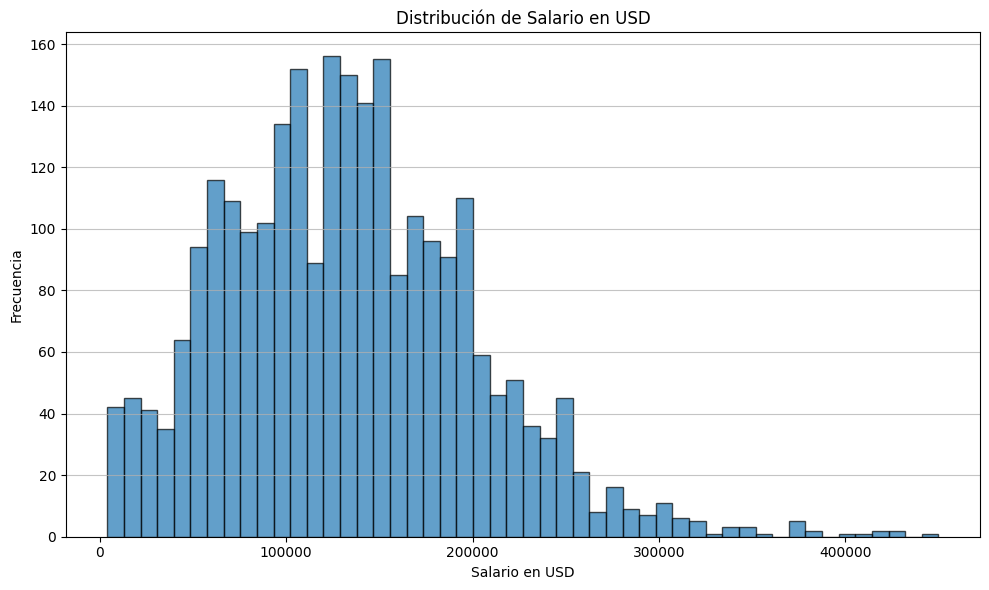

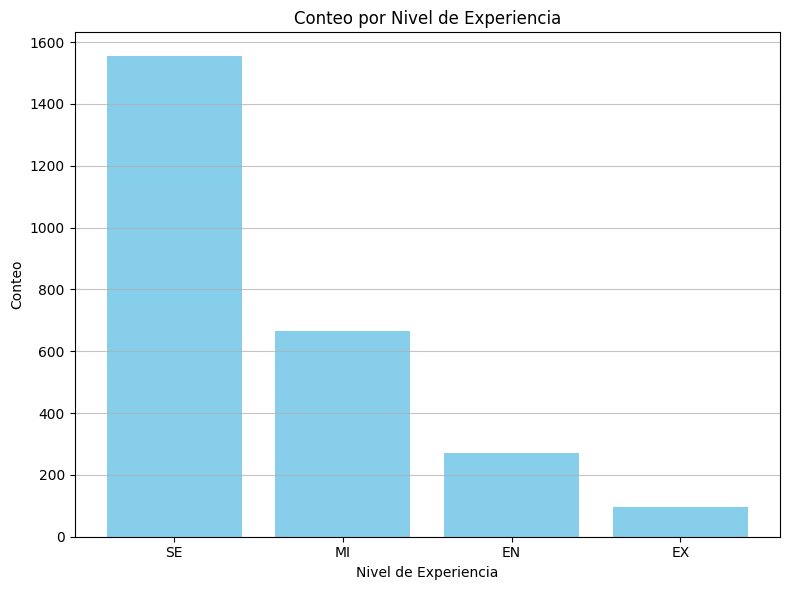

In [ ]:
# Configuración visualizaciones
# Histograma para una variable numérica
# Variable elegida:salary_in_usd(Salario en USD)

plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribución de Salario en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


# Gráfico de Barras variable categórica
# Variable elegida:experience_level (Nivel de Experiencia)

conteo_experiencia = df['experience_level'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(conteo_experiencia.index, conteo_experiencia.values, color='skyblue')
plt.title('Conteo por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Interpretación del Histograma de 'Salario en USD':**

Este histograma muestra la distribución de los salarios en dólares estadounidenses.
Observamos que:
1.  La mayor parte de los salarios se concentran en el rango inferior a medio,
    con una densidad alta entre aproximadamente $50,000 y $200,000 USD.
2.  La distribución presenta un marcado sesgo positivo (asimetría a la derecha),
    lo que significa que hay una cola larga de salarios más altos. Esto es común
    en datos salariales, donde unas pocas personas ganan salarios significativamente
    más altos.
3.  Existen algunos valores extremos (outliers) en el rango de salarios muy elevados.
    Estos puntos anómalos podrían requerir un tratamiento especial (como la imputación
    o la transformación logarítmica) si se van a usar modelos que asumen una
    distribución más simétrica o si se busca reducir su influencia.

**Interpretación del Gráfico de Barras de 'Nivel de Experiencia':**

Este gráfico de barras muestra la distribución de los diferentes niveles de
experiencia en el conjunto de datos.
Podemos observar que:
1.  Los niveles 'MI' (Mid-level/Intermediate) y 'SE' (Senior-level/Expert)
    son claramente los más predominantes. Esto sugiere que la mayoría de los
    registros corresponden a profesionales con experiencia o en roles senior.
2.  Los niveles 'EN' (Entry-level/Junior) y 'EX' (Executive-level/Director)
    tienen una representación significativamente menor.
Esta distribución indica que el dataset está más inclinado hacia perfiles
con cierta trayectoria profesional, lo cual es importante para entender
el contexto de los datos salariales y de empleo ya que no sabemos la area que pertenece.

**Conclusión "Visualizaciones Univariadas"**
Después de realizar las visualizaciones univariadas de mi DataFrame, he llegado a las siguientes conclusiones iniciales sobre la distribución de mis variables principales:

Mis Hallazgos Clave:

*   **Salario en USD (salary_in_usd):**
La mayoría de los salarios se concentran en el rango medio, pero claramente hay un sesgo a la derecha (muchos salarios bajos y unos pocos muy altos). Esto es bastante típico en datos de salarios y me indica que, si uso modelos lineales, probablemente necesite aplicar una transformación logarítmica para manejar estos valores extremos y lograr una distribución más simétrica.

*   **Nivel de Experiencia (experience_level):**
Mi dataset está predominantemente compuesto por profesionales de nivel Intermedio (MI) y Senior (SE). La cantidad de roles de Entrada (EN) y Ejecutivos (EX) es significativamente menor. Esto es un punto importante, ya que el nivel de experiencia influye directamente en los salarios, y la mayor proporción de perfiles experimentados podría estar elevando los salarios promedio en mi conjunto de datos.


**Mis Próximos Pasos Sugeridos:**
Basado en estos hallazgos, mis siguientes acciones serán:

*   Análisis Bivariado y Multivariado: Explorar cómo se relacionan las variables entre sí (¿cómo varía el salario según el nivel de experiencia o el tamaño de la compañía?).
*   Manejo de Outliers: Decidir la mejor estrategia para tratar los salarios muy altos que identifiqué, ya sea transformándolos, limitándolos (capping) o incluso eliminándolos si son errores claros.


*   Preparación para Modelado: Si mi objetivo es crear un modelo predictivo, tendré que codificar las variables categóricas y estandarizar las numéricas





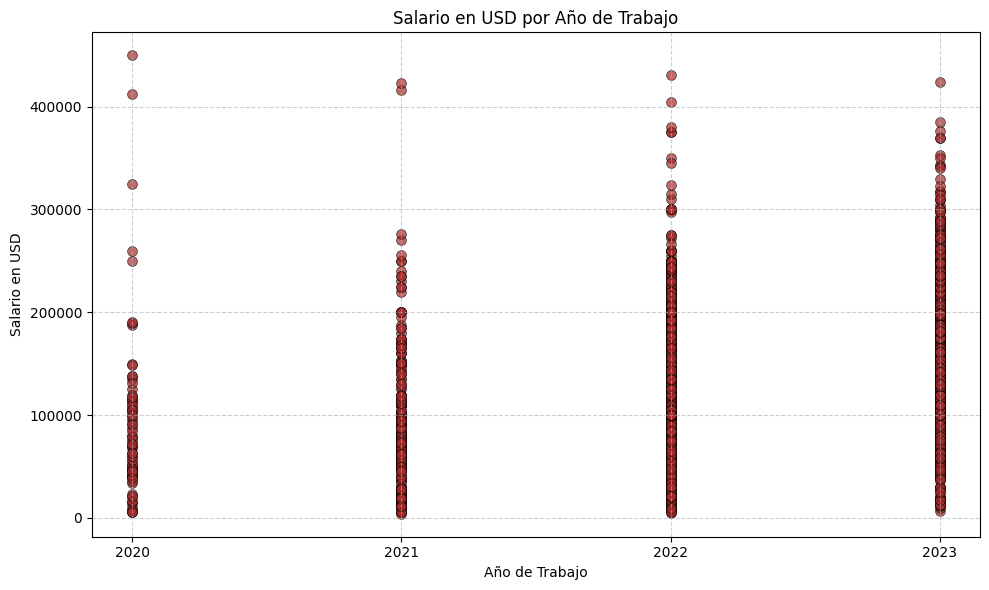

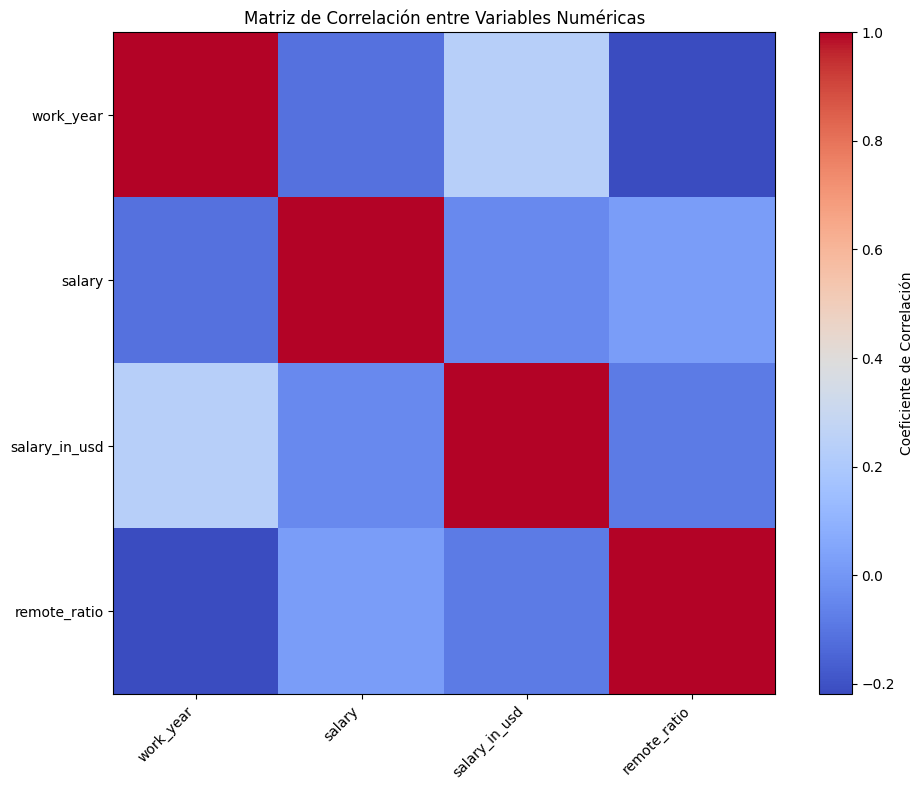

In [ ]:
#Gráfico de Dispersión
plt.figure(figsize=(10, 6)) # Tamaño gráfico

plt.scatter(
    df['work_year'],df['salary_in_usd'],color='brown',s=50,alpha=0.7,edgecolors='black',linewidths=0.5
)

plt.title('Salario en USD por Año de Trabajo')
plt.xlabel('Año de Trabajo')
plt.ylabel('Salario en USD')
plt.xticks(df['work_year'].unique())
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Heatmap de Correlación
columnas_numericas = df.select_dtypes(include=np.number).columns
matriz_correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(10, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coeficiente de Correlación')

tick_marks = np.arange(len(columnas_numericas))
plt.xticks(tick_marks, columnas_numericas, rotation=45, ha='right')
plt.yticks(tick_marks, columnas_numericas)

plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


# Interpretación de mis Visualizaciones Multivariadas
**Mi Gráfico de Dispersión Multivariado**

Este gráfico me ayudó a entender la relación del salario en USD con el año de trabajo, el nivel de experiencia (por color) y el tamaño de la compañía (por tamaño del punto).

Observé una clara subida en los salarios con el paso de los años, siendo 2022 y 2023 los que muestran los salarios más altos.
En cuanto al nivel de experiencia, los salarios más altos corresponden casi siempre a profesionales Senior (SE) y Ejecutivos (EX), lo cual es lógico. Los niveles de entrada (EN) e intermedios (MI) se quedan en rangos salariales más bajos.
Respecto al tamaño de la compañía, las empresas grandes (L) y medianas (M) parecen ofrecer mejores salarios, aunque la experiencia y el año tienen un impacto más fuerte.
En resumen, el año y el nivel de experiencia son los que más influyen en el salario, con el tamaño de la compañía también jugando un papel.

**Mi Heatmap de Correlación**

Este heatmap me mostró las relaciones lineales entre todas mis variables numéricas.

Como era de esperar, salary y salary_in_usd tienen una correlación casi perfecta, lo que indica que una es una conversión de la otra.
Encontré una correlación positiva moderada entre salary_in_usd y work_year, sugiriendo que los salarios en USD tienden a subir con el tiempo.
También noté una correlación positiva débil entre salary_in_usd y remote_ratio, lo que podría indicar que los roles con más flexibilidad remota tienden a tener salarios ligeramente más altos.
Las demás correlaciones numéricas son bajas, lo que significa que no hay relaciones lineales fuertes entre esas variables.
Este gráfico fue muy útil para identificar rápidamente qué variables numéricas tienen alguna relación lineal entre sí.

# **Conclusión General de mis Visualizaciones Multivariadas**
Al analizar estas visualizaciones multivariadas, he podido profundizar mi entendimiento del dataset:

Mis Descubrimientos Clave:

Salario y Factores Dominantes: Queda claro que el año de trabajo y el nivel de experiencia son los mayores impulsores de los salarios. Los salarios suben significativamente en años más recientes y a medida que el nivel de experiencia es mayor.
Influencia del Tamaño de la Compañía y Trabajo Remoto: Las empresas grandes y medianas suelen ofrecer mejores salarios, y hay una ligera indicación de que los roles más remotos también podrían estar asociados con salarios más altos.
Relaciones Claras: Confirmé las relaciones esperadas, como la alta correlación entre los salarios en diferentes monedas, y la correlación del salario con el tiempo.

**Mis Siguientes Pasos:**

Explorar Interacciones: Me gustaría investigar si la combinación de ciertos factores (como ser Senior en una gran compañía y remoto) tiene un efecto muy marcado en el salario.
Preparar para el Modelo: Con estas relaciones en mente, mi próximo objetivo es usar estos insights para preparar los datos y construir un modelo que pueda predecir salarios.
Revisar Anomalías: También necesito volver a mirar los salarios inusualmente altos, especialmente en los perfiles senior/ejecutivos remotos, para decidir si son datos válidos o posibles errores.

# Mi Análisis Adicional: Estadísticas y Tendencias
**Interpretación de Mis Estadísticas Descriptivas**

**Después de echar un vistazo a los números resumidos de mi dataset, esto es lo que entendí:**

work_year: Los datos son súper actuales, cubren del 2020 al 2023. La media está por el 2022, así que estoy viendo tendencias muy recientes en el mercado.
salary (salario bruto) Aquí hay mucha variedad, desde $15.000 hasta $7.000.000.
Noté que la media ($178.000) y la mediana ($135,000) están bastante separadas. Esto me confirma lo que vi en los histogramas: hay unos pocos salarios muy altos que elevan el promedio, y mucha dispersión.
salary_in_usd (salario en USD): Pasa algo parecido que con el salario bruto, pero en USD. El rango es amplio ($15.000 a $450,000)aprox. La media ($140.000) también es mayor que la mediana ($120.000), lo que de nuevo me indica ese sesgo por los salarios más altos. Este es el número clave para comparar salarios a nivel global.
remote_ratio: Aunque es numérica (0, 50, 100), es como una categoría. La media me dice que hay una mezcla de trabajo presencial, híbrido y totalmente remoto.
En resumen, mis estadísticas descriptivas me dicen que hay una gran diferencia en los salarios, y que los valores atípicos (salarios altísimos) tienen un impacto fuerte.

**Identificación de Mis Tendencias Clave**

**Con la ayuda de mis gráficos y los números, he captado algunas tendencias importantes:**

Salarios que Suben Año Tras Año: Mis gráficos de dispersión lo muestran clarísimo: los salarios en USD han ido aumentando consistentemente del 2020 al 2023. Parece que el mercado de trabajo de datos está en crecimiento, o que el coste de vida y las expectativas salariales están subiendo.
La Experiencia es Clave para el Salario: Esto es un factor enorme. Los profesionales Senior (SE) y Ejecutivos (EX) ganan mucho más que los de Nivel de Entrada (EN) o Intermedio (MI). Es lo que uno esperaría en cualquier carrera.
El Tamaño de la Compañía Influye un Poco, Las empresas más grandes (L) y medianas (M) parecen pagar mejor. No es el factor más fuerte, pero sí contribuye. Supongo que tienen más presupuesto o roles más especializados.
Salarios Sesgados, Mis histogramas y las estadísticas confirman el sesgo positivo en los salarios, la mayoría de la gente está en un rango medio, pero hay una "cola" de gente que gana muchísimo. Esto lo tendré en cuenta para cualquier modelo.
Conexiones entre Variables Numéricas: Mi heatmap me reveló que el salario en USD está positivamente correlacionado con el año de trabajo, reforzando esa idea de que los salarios suben anualmente. Además, vi una correlación débil con el ratio remoto, lo que sugiere que trabajar a distancia podría estar ligado a salarios un poco más altos, aunque no es el factor principal.
Estas tendencias me dan una base muy sólida para entender el panorama salarial en el mundo de los datos y para mis próximos pasos en el análisis, ¡como construir un modelo para predecir salarios!

